# S&P 500 Companies Data Analysis

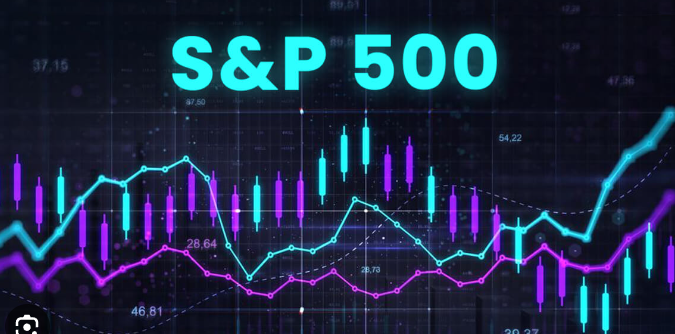

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [3]:
sns.set()

In [4]:
# Importing dataset

In [5]:
df = pd.read_csv('financials.csv')

### Expolaratory Data Analysis

In [6]:
#top rows
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [7]:
#Row-Column
df.shape

(505, 14)

In [8]:
#Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [9]:
#Columns
df.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [10]:
#Statistics
df.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [11]:
#Null check
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

In [14]:
# Filling the null values with mean values of the column
df['Price/Earnings'].fillna(df['Price/Earnings'].mean(), inplace = True)
df['Price/Book'].fillna(df['Price/Book'].mean(), inplace = True)

In [15]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

In [16]:
# Top companies with most market share

In [23]:
df1 = df[['Name', 'Market Cap']].sort_values( by = 'Market Cap', ascending = False).head(10)
df1

,Name,Market Cap
51,Apple Inc.,8.095080e+11
27,Alphabet Inc Class A,7.338240e+11
28,Alphabet Inc Class C,7.285356e+11
311,Microsoft Corp.,6.899784e+11
30,Amazon.com Inc,6.858734e+11
187,"Facebook, Inc.",5.234230e+11
263,JPMorgan Chase & Co.,3.866136e+11
261,Johnson & Johnson,3.530625e+11
185,Exxon Mobil Corp.,3.261487e+11
66,Bank of America Corp,3.214782e+11


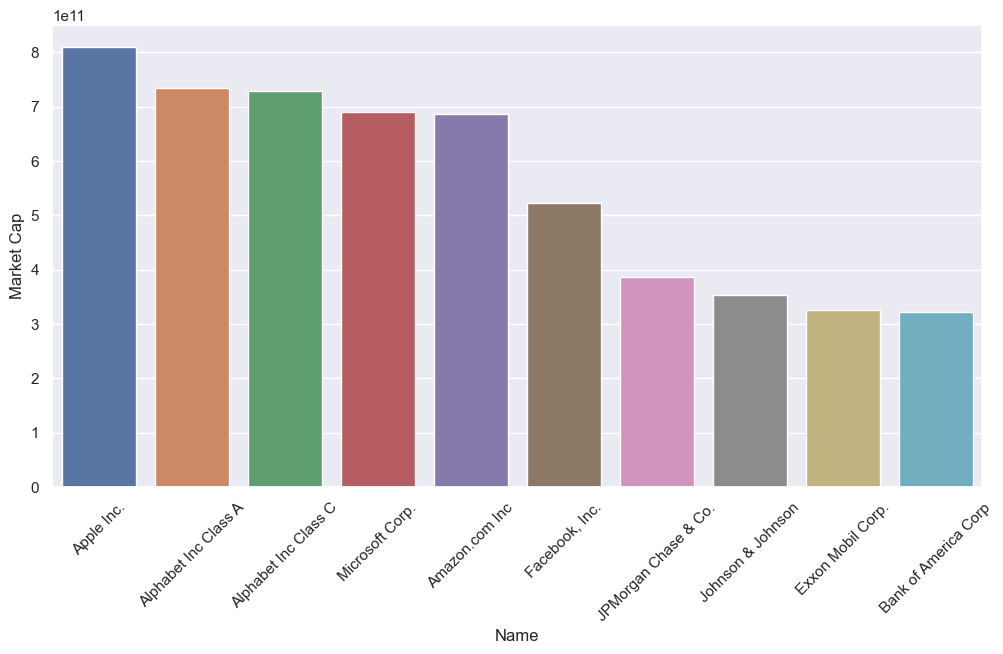

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Name', y = 'Market Cap', data = df1)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Top Share Prices

In [33]:
df2 = df[['Name', 'Price']].sort_values( by = 'Price', ascending = False).head(10)
df2

,Name,Price
372,Priceline.com Inc,1806.06
30,Amazon.com Inc,1350.50
27,Alphabet Inc Class A,1007.71
28,Alphabet Inc Class C,1001.52
61,AutoZone Inc,718.57
306,Mettler Toledo,601.00
73,BlackRock,509.38
174,Equinix,409.98
411,Sherwin-Williams,387.65
254,Intuitive Surgical Inc.,381.87


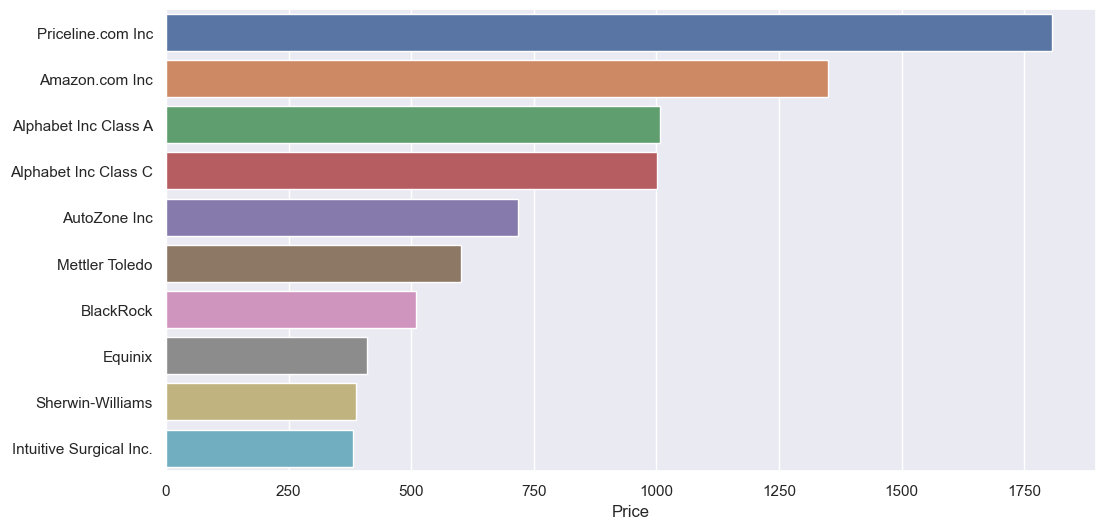

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Price', y = 'Name', data = df2)
plt.ylabel(None)
plt.show()

In [37]:
#Sector wise

In [43]:
df3 = df['Sector'].value_counts().head(5)
df3

Sector
Consumer Discretionary    84
Information Technology    70
Financials                68
Industrials               67
Health Care               61
Name: count, dtype: int64

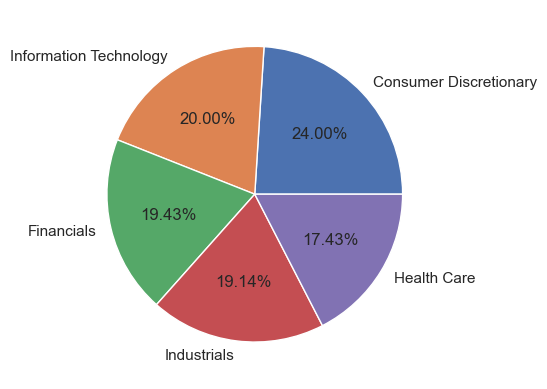

In [48]:
df3.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.show()

In [51]:
# Sector wise avg shares price

In [53]:
df4 = df.groupby('Sector')['Price'].mean().sort_values(ascending = True)
df4

Sector
Telecommunication Services     33.603333
Utilities                      55.194643
Energy                         57.887500
Consumer Staples               79.764118
Real Estate                    88.712727
Financials                     89.056029
Materials                     102.386800
Industrials                   116.887612
Information Technology        119.242857
Consumer Discretionary        124.034524
Health Care                   132.515738
Name: Price, dtype: float64

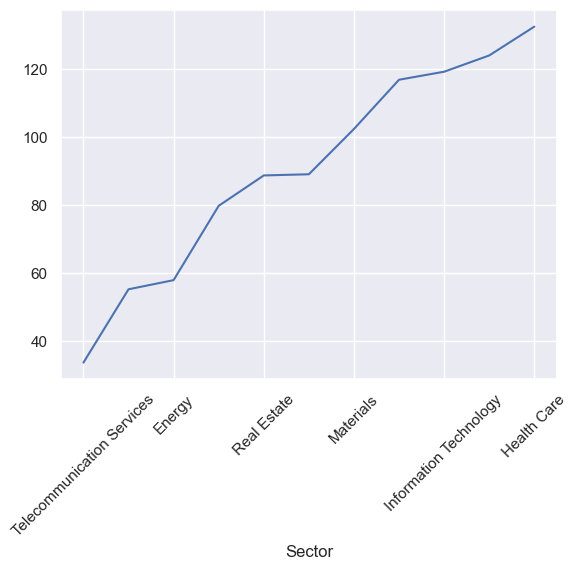

In [56]:
df4.plot()
plt.xticks(rotation = 45)
plt.show()

In [63]:
# Violin Plot

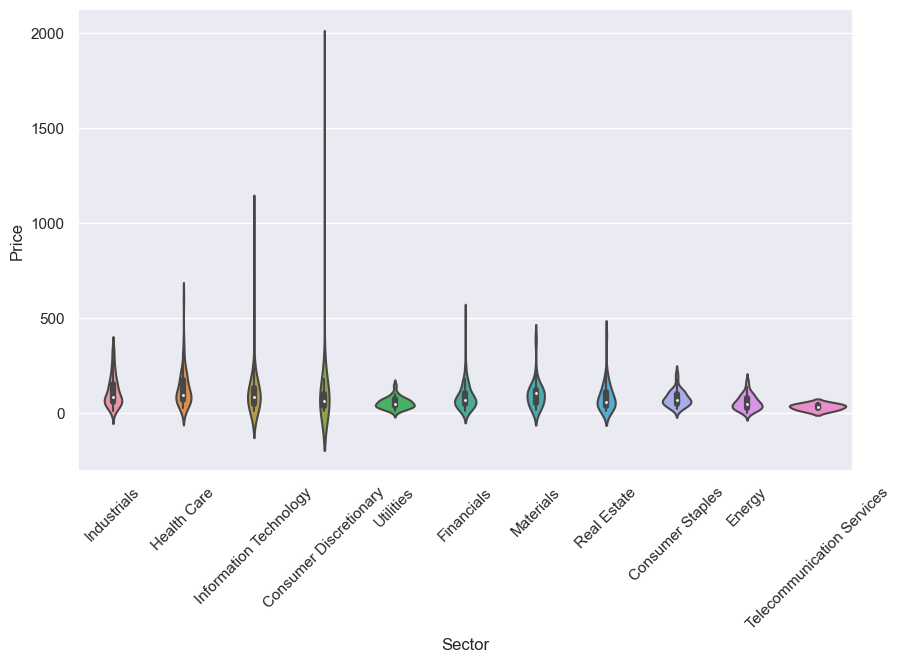

In [65]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'Sector', y = 'Price', data = df)
plt.xticks(rotation = 45)
plt.show()

In [66]:
# Share price dist

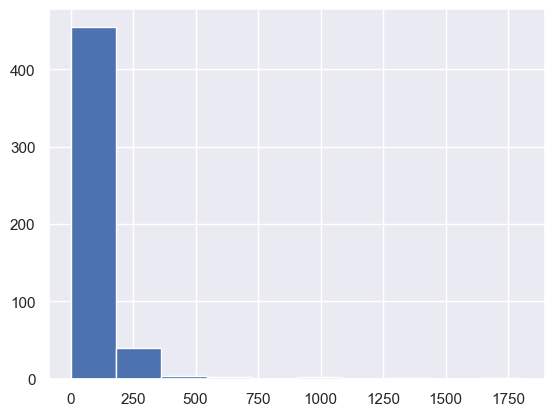

In [68]:
df['Price'].hist()
plt.show()

# USA Top 50 Companies Data Analysis

In [77]:
data = pd.read_csv('Top 50 US Tech Companies 2022 - 2023.csv')

In [78]:
data.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


In [73]:
data.shape

(50, 10)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Company Name                                      50 non-null     object 
 1   Industry                                          50 non-null     object 
 2   Sector                                            50 non-null     object 
 3   HQ State                                          50 non-null     object 
 4   Founding Year                                     50 non-null     int64  
 5   Annual Revenue 2022-2023 (USD in Billions)        50 non-null     float64
 6   Market Cap (USD in Trillions)                     50 non-null     float64
 7   Stock Name                                        50 non-null     object 
 8   Annual Income Tax in 2022-2023 (USD in Billions)  50 non-null     float64
 9   Employee Size          

In [80]:
data.isnull().sum()

Company Name                                        0
Industry                                            0
Sector                                              0
HQ State                                            0
Founding Year                                       0
Annual Revenue 2022-2023 (USD in Billions)          0
Market Cap (USD in Trillions)                       0
Stock Name                                          0
Annual Income Tax in 2022-2023 (USD in Billions)    0
Employee Size                                       0
dtype: int64

In [87]:
df7 = data[['Company Name','Market Cap (USD in Trillions)']].sort_values(by = 'Market Cap (USD in Trillions)', ascending = False).head(10)
df7

,Company Name,Market Cap (USD in Trillions)
0,Apple Inc.,2.520
1,Microsoft Corporation,2.037
2,Alphabet (Google),1.350
3,Amazon,1.030
4,NVIDIA Corporation,0.653
5,Tesla,0.625
6,Meta Platforms,0.524
7,Broadcom Inc.,0.266
8,Oracle Corporation,0.236
9,Cisco Systems Inc.,0.208


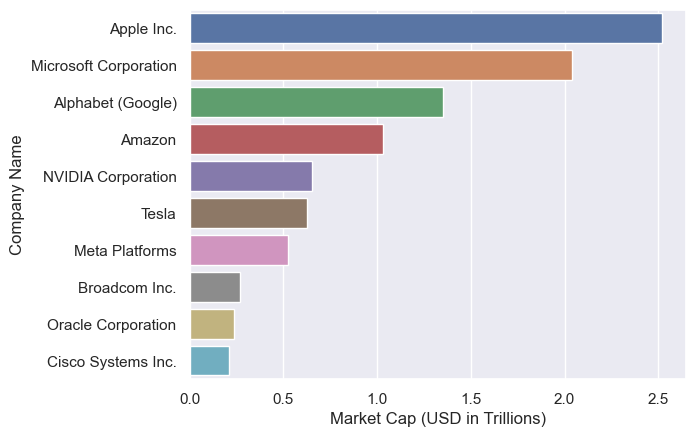

In [90]:
sns.barplot(x = 'Market Cap (USD in Trillions)', y = 'Company Name', data = df7)
plt.show()

In [91]:
data['Industry'].value_counts()

Industry
Technology    50
Name: count, dtype: int64

All the companies in the top50 are of 'Technology' sector

In [93]:
df8 = data['Sector'].value_counts()
df8

Sector
Software Application        15
Semiconductors              14
Software Infrastructure     12
IT Services                  3
Computer Hardware            3
Consumer Electronics         1
Communication Equipments     1
Electronic Components        1
Name: count, dtype: int64

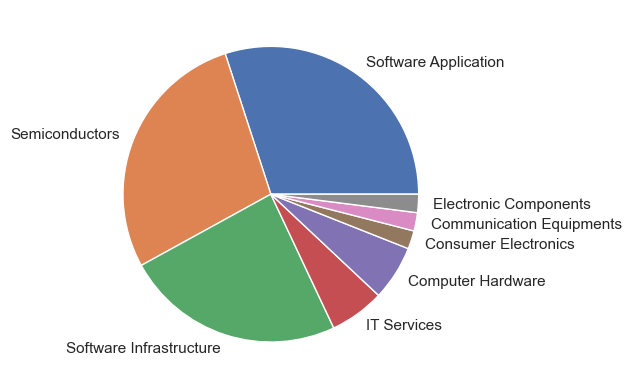

In [97]:
df8.plot(kind = 'pie')
plt.ylabel(None)
plt.show()